In [1]:
#爬取B站up主王冰冰的第一条vlog下的评论
#将爬取到的数据写入Comment.csv文件
import requests

import json

import time

import pandas as pd

import random


def GetHtml(url):        
    proxy = {
    'http': '180.97.33.144:80'  #代理，防止ip被封
}
    headers = {
        'accept':'*/*',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36 Edg/87.0.664.75',
        'referer': 'https://www.bilibili.com/',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
    }

    try:

        r = requests.get(url, headers=headers,proxies=proxy)

        r.raise_for_status()

        print(r.url)

        return r.text

    except requests.HTTPError as e:

        print(e)

        print("HTTPError")

    except requests.RequestException as e:

        print(e)

    except:

        print("Unknown Error !")


def GetData(html):
    try:

        s = json.loads(html)

    except:

        print('error')

    commentlist = [] #存放评论信息

    hlist = []

    hlist.append("序号")

    hlist.append("名字")

    hlist.append("性别")

    hlist.append("时间")

    hlist.append("评论")

    hlist.append("点赞数")

    hlist.append("回复数")
    
    hlist.append("rpid数据")

    # commentlist.append(hlist)

    # 楼层，用户名，性别，时间，评价，点赞数，回复数
    num= len(s['data']['replies'])

    for i in range(num):  

        comment = s['data']['replies'][i]

        blist = []

        username = comment['member']['uname']

        sex = comment['member']['sex']

        ctime = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(comment['ctime']))

        content = comment['content']['message']

        likes = comment['like']

        rcounts = comment['rcount']

        signature = comment['member']['sign']

        level = comment['member']['level_info']['current_level']
        
        rpid= comment['rpid']

        blist.append(username)

        blist.append(sex)

        blist.append(ctime)

        blist.append(content)

        blist.append(likes)

        blist.append(rcounts)

        blist.append(signature)

        blist.append(level)
        
        blist.append(rpid)

        commentlist.append(blist)

    writePage(commentlist)

    print('---' * 34)


def writePage(urating):
    dataframe = pd.DataFrame(urating)

    dataframe.to_csv('CommentData.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")

if __name__ == '__main__':
    e=0
#     page=1
    while e==0:
         for page in range(1,11):     
            url = "https://api.bilibili.com/x/v2/reply?pn=" + str(page) + "&type=1&oid=800760067&sort=2&_=1611129881759"
        #爬取‘吃花椒的喵酱’（王冰冰）的第一条视频下根据热度排名的评论前10页；不同的oid代表了不同的视频
            try:
                html = GetHtml(url)
                #print(html)
                print('page:', page)
                GetData(html)
                time.sleep(10)  # 每爬一页休息10秒，防止访问过快被封IP
                if page==10:
                    e = 1 #爬取结束跳出循环
            except:
                e = 1



https://api.bilibili.com/x/v2/reply?pn=1&type=1&oid=800760067&sort=2&_=1611129881759
page: 1
------------------------------------------------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=2&type=1&oid=800760067&sort=2&_=1611129881759
page: 2
------------------------------------------------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=3&type=1&oid=800760067&sort=2&_=1611129881759
page: 3
------------------------------------------------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=4&type=1&oid=800760067&sort=2&_=1611129881759
page: 4
------------------------------------------------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=5&type=1&oid=800760067&sort=2&_=1611129881759
page: 5
------------------------------------------------------------------------------------------------------
https://api.bilibili

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.537 seconds.
Prefix dict has been built successfully.


'C:\\Users\\lenovo\\各个大学被赞数及被回复数.html'

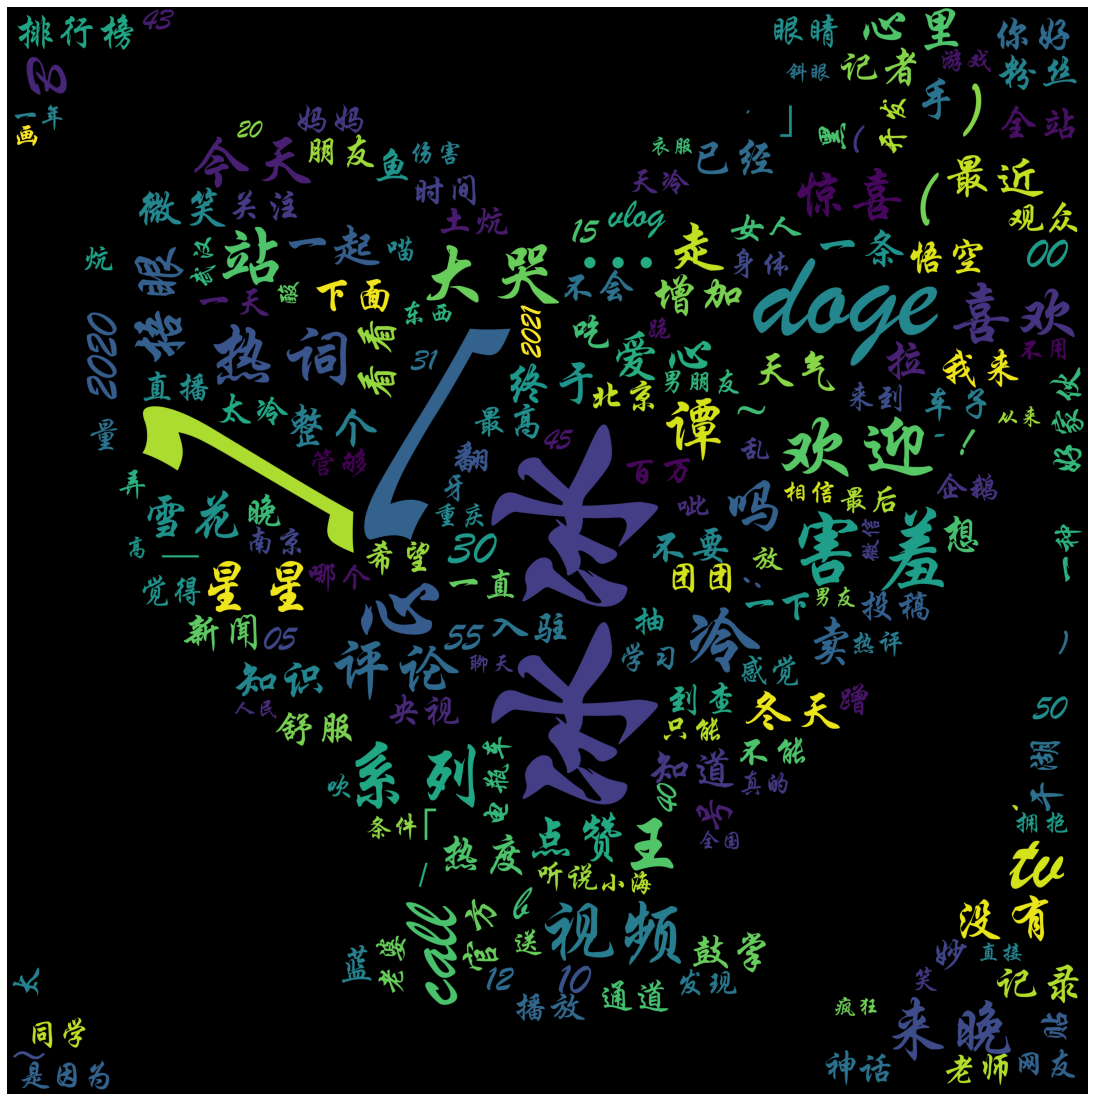

In [2]:
#在jupyter notebook里使用
#进行简单的数据清洗并进行数据可视化
#数据可视化包括评论热度Top20.html、评论词云图.png、评论账号等级分布.html、各个大学被赞数及被回复数.html
#各大学回复数据通过数据清洗写进xls表格中
import pandas as pd

data = pd.read_csv(r"CommentData.csv")
col = ['uname', 'sex', 'ctime', 'content', 'likes', 'rcounts', 'signature', 'level','rpid']
data.columns = col
data.head()

#-----------------------------------
data.describe()
#-----------------------------------
data.dropna() #进行简单的数据清洗，删除有缺失的数据
#-----------------------------------
data.drop_duplicates() #去除重复数据
#-----------------------------------
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

df1 = data.sort_values(by="likes",ascending=False).head(20)
#print(df1)
#-----------------------------------
df1[df1['level'] >= 20]

bar=Bar()
#print(df1["content"].to_list())
bar.add_xaxis(df1["content"].to_list())
#print(df1["likes"])
bar.add_yaxis("likes", df1["likes"].to_list(), color=Faker.rand_color())
bar.set_global_opts(title_opts=opts.TitleOpts(title="评论热度Top20"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")])  
bar.render("评论热度Top20.html")

#-----------------------------------
from wordcloud import WordCloud, ImageColorGenerator
import jieba
from tkinter import _flatten
from matplotlib.pyplot import imread
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
with open(r'C:\Users\lenovo\Desktop\cn_stopwords.txt', 'r',encoding='utf-8') as f: #中文停用词表
    stopWords = f.read()
with open(r'C:\Users\lenovo\Desktop\hit_stopwords.txt','r',encoding='utf-8') as t: #哈工大停用词表
    stopWord = t.read()
total = stopWord.split() + stopWords.split()
def my_word_cloud(data=None, stopWords=None, img=None):
    dataCut = data.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopWords])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
    mask = plt.imread(img)
    plt.figure(figsize=(20,20))
    wc  = WordCloud(scale=10,font_path='C:/Windows/Fonts/STXINGKA.TTF',mask=mask,background_color='black',)
    wc.fit_words(wordFre)
    wc.to_file('评论词云图.png')
    plt.imshow(wc)
    plt.axis('off')
my_word_cloud(data=data["content"],stopWords=stopWords,img=r"C:\Users\lenovo\Desktop\BGP.jpg")

#-----------------------------------
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

LevelData=data['level'].to_list()
m=len(LevelData)
LevelNum=[]
level1,level2,level3,level4,level5,level6=0,0,0,0,0,0
#B站最高等级为6级
for i in range(m):
    if LevelData[i]==1:
        level1+=1
    elif LevelData[i]==2:
        level2+=1
    elif LevelData[i]==3:
        level3+=1
    elif LevelData[i]==4:
        level4+=1
    elif LevelData[i]==5:
        level5+=1
    else:
        level6+=1
for i in range (1,7):
    if eval('level{}'.format(i))!=0:
        LevelNum.append(eval('level{}'.format(i)))
#print(LevelNum)
pie=Pie()
pie.add(
        "",
        [list(z) for z in zip([str(i) for i in range(min(LevelData),max(LevelData)+1)],LevelNum )],
        radius=["40%", "75%"]
        ).set_global_opts(
        title_opts=opts.TitleOpts(title="评论账号等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%")
        ).set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}")
        )
pie.render("评论账号等级分布.html")

#-----------------------------------

import xlwt

uname=data['uname'].tolist()
likes=data['likes'].tolist()
rcounts=data['rcounts'].tolist()
# print(uname)
# print(likes)
# print(rcounts)
n=len(uname)
key=u'大学'
number=1
#新建表格空间
excel1 = xlwt.Workbook(encoding = 'utf-8')
# 设置单元格格式
sheet1 = excel1.add_sheet('University', cell_overwrite_ok=True)
sheet1.write(0, 0, 'uname')
sheet1.write(0, 1, 'likes')
sheet1.write(0, 2, 'rcounts')
for i in range(0,n):
    try:
        if key in uname[i]:
            sheet1.write(number,0,uname[i])
            sheet1.write(number,1,likes[i])
            sheet1.write(number,2,rcounts[i])
            number+=1
            excel1.save("University.xls")
    except:
        pass
file = pd.read_excel(r'University.xls',sheet_name='University')
f = pd.DataFrame(file)
# print(f)
bar2=Bar()
bar2.add_xaxis(f['uname'].tolist())
bar2.add_yaxis('likes',f['likes'].tolist(),color='blue').add_yaxis('rcounts',f['rcounts'].tolist(),color='black')
bar2.set_global_opts(title_opts=opts.TitleOpts(title="各个大学被赞数及被回复数"),
         datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="slider")])  
bar2.render("各个大学被赞数及被回复数.html")

正在爬取第1条评论数据中的第1页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第2页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第3页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第4页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第5页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第6页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第7页的回复数据......
----------------------------------------------------------------------------------------------------
正在爬取第1条评论数据中的第8页的回复数据......
---------------------------------------------------------------------

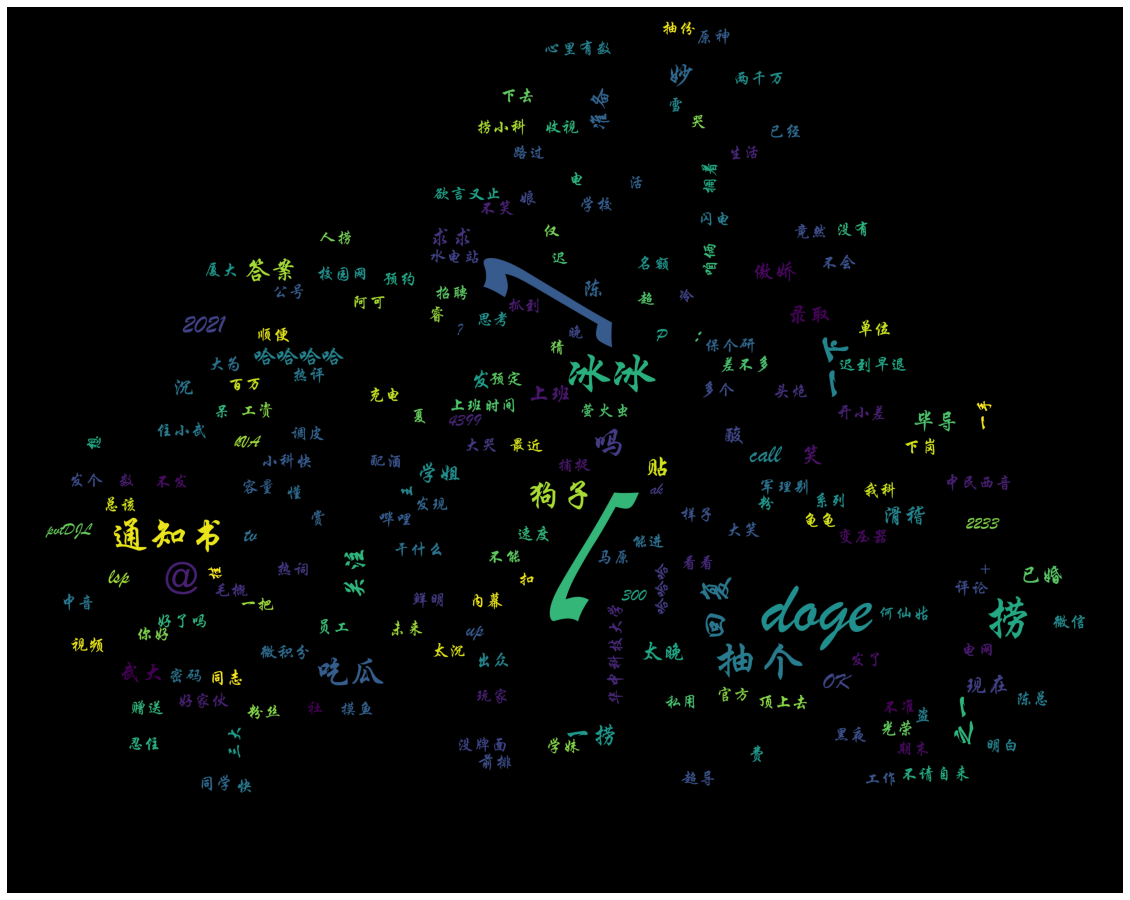

In [4]:
#爬取王冰冰第一条vlog下的前十条评论的前20页回复
#将数据写进ReplyData.csv中进行简单数据清洗，并绘制词云图
import json, requests
import pandas as pd
from datetime import *
import time


def get_reply_data(page,rpid):
	reply_data_lst =[]
	#每一条评论只爬取前20页回复
	for i in range(1,21):
		print('正在爬取第{}条评论数据中的第{}页的回复数据......'.format(page+1,i))
		print('----'*25)
		reply_url = 'https://api.bilibili.com/x/v2/reply/reply?&pn={}&type=1&oid=800760067&ps=10&root={}'.format(page+1,rpid)
		html = requests.get(url=reply_url, headers=header)
		reply_data = html.json()['data']['replies']
		try:
			for data in reply_data:
				dic_reply = {}
				dic_reply['comment'] = data['content']['message']
				dic_reply['member'] = data['member']['uname']
				dic_reply['like'] = data['like']
				dic_reply['time'] = datetime.fromtimestamp(data['ctime'])
				reply_data_lst.append(dic_reply)
				#print('昵称: {}\n点赞数：{}\n'.format(dic_reply['member'], 
						#dic_reply['like'] ))

# 			if reply_page > 1: 
# 				break
		except Exception as Reply_Page_Error:
			break

	return reply_data_lst
#---------------
if __name__ =='__main__':
    header = {
    'User. Agent ': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36 Edg/87.0.664.75',
    'Referer': 'https://www.bilibili.com/video/BV1Bz4y1z72s'
    }
    oid=800760067
    now_time = int(time.time()*1000)
    # get_ base. info(800760067)
#只怕爬取十条评论的前20页回复
    for page in range(0,10):
        df = pd.DataFrame(get_reply_data(page,data['rpid'][page]))
        df.to_csv('ReplyData.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")
#     print(df.head())
#     print(len(df))
#---------------
from wordcloud import WordCloud, ImageColorGenerator
import jieba
from tkinter import _flatten
from matplotlib.pyplot import imread
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
data_2 = pd.read_csv(r"ReplyData.csv")
col_2 = ['reply','uname','like','ctime']
data_2.columns = col_2
#print(data2)
with open(r'C:\Users\lenovo\Desktop\cn_stopwords.txt', 'r',encoding='utf-8') as f: #中文停用词表
    stopWords = f.read()
with open(r'C:\Users\lenovo\Desktop\hit_stopwords.txt','r',encoding='utf-8') as t: #哈工大停用词表
    stopWord = t.read()
total = stopWord.split() + stopWords.split()
def my_word_cloud2(data=None, stopWords=None, img=None):
    dataCut = data.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopWords])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
    mask = plt.imread(img)
    plt.figure(figsize=(20,20))
    wc  = WordCloud(scale=10,font_path='C:/Windows/Fonts/STXINGKA.TTF',mask=mask,background_color='black',)
    wc.fit_words(wordFre)
    wc.to_file('回复词云图.png')
    plt.imshow(wc)
    plt.axis('off')
my_word_cloud2(data=data_2['reply'],stopWords=stopWords,img=r"C:\Users\lenovo\Desktop\REPLY_BGP.jpg")
